## Implmenting the Jaynes cumming model using density matrix 

* The goal of this notebook is to implement the **Jaynes-Cummings Hamiltonian** for the Transmon qubit and see the dynamics over time. For instance what happens if we have a single transmon qubit ($H_T = \omega_a \sigma^+ \sigma^-$) coupled to a single mode of a resonator ( $ H_R =  \omega_ca^+a $ ). 
* As we can see the the resonator hamiltonian and Transmon qubit hamiltonial looks same as simple harmonic oscillator. The coupling term between this two is given as $ H_{int} = g(a^+\sigma^- + a \sigma^+) $ .


So out Hamiltonian will look like: 
<center>
$\displaystyle H = H_T + H_R + H_{int} = \omega_a \sigma^+ \sigma^- + \omega_ca^+a + g(a^+\sigma^- + a \sigma^+) $
<center>

The initial state of the qubit will look like as five levels of the resonator with the ground state occupied (means no photon in the system) and transmon in the exited state. We will put this two together as a tensor product between them to get the state that we can operate on with the hamiltonian H. 


           



### importing the libraries requaired

In [51]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

from definations import *


In [52]:
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


### implenenting the parameters

In [71]:
wc = 1.0 * 2 * np.pi  # resonator frequency
wa = 1.0 * 2 * np.pi  # transmon frequency
g = 0.05 * 2 * np.pi  # coupling strength
T = 1                 # Time range
Nt = 100               # number of steps
hbar = 1.0  # $\hbar$ value

### defining some functions 

In [62]:
def computeDensityMatrix(H, initialState, T, Nt):
    '''
        Take the Hamiltonian H and the intial state (density matrix) of the
        system and the time over which we want the dynamics. Returns  final
        state density matrix and the time range.
    '''
    # getting eigunstates and eigunvalues for the Hamiltonian
    energies, states = np.linalg.eig(H)
    states_inverse = np.linalg.inv(states)
    num_states = H.shape[0]

    # defining the time range
    timeRange = np.arange(0, T, T/Nt)

    # defining the time evolution part in the base of the eigunstates
    wjk = ((np.kron(energies, np.ones(num_states))
         - np.kron(np.ones(num_states), energies))/hbar).reshape(num_states, num_states)
    # print(wjk)
    Omega = np.exp(-1j * wjk[np.newaxis, :] * timeRange[:, np.newaxis, np.newaxis])
    # print(Omega.shape)

    # creating the intial density matrix by doing the tensor product of the intial state
    initial_rho = np.kron(initialState.transpose(), initialState)
    # print(initial_rho.shape)

    # transforming the intial density matrix to the density matrix with eigunstates basis
    rhoprime0 = np.matmul(np.matmul(states_inverse, initial_rho), states)

    # evolution of the density matrix in eigunstate basis
    rhoprime_woNoise = Omega * rhoprime0

    # transforming it back to the intial base states
    rho_woNoise = np.matmul(np.matmul(states, rhoprime_woNoise), states_inverse)

    return timeRange, rho_woNoise

### implementing the operators and Hamiltonian 

In [63]:
sx = np.array([[0, 1], [-1, 0]])               # Pauli X operator
sy = np.array([[0, -1j], [1j, 0]])             # pauli Y operator
sz = np.array([[1, 0], [0, -1]])               # pauli z operator

# tensor product means Kronecker product, check np.kron(a,b)

A = np.kron(a(4), np.eye(2))            # for cavity annhilation operator (5,5) in tensor product with identity operator(2,2)
Adag = np.kron(adagger(4), np.eye(2))   # for cavity creation operator(5,5) in tensor product with identity operator (2,2)
sigplus = np.kron(np.eye(5), adagger(1))     # for transmon raising operator in tensor product with identity operator (5,5)
sigminus = np.kron(np.eye(5), a(1))          # for transmon lowering operator in tensor product with identity operator (5,5)
Sz = np.kron(np.eye(5), sz)                  # for transmon pauli z operator in tensor product with identity operator (5,5)


# Hamiltonian
H = wc * np.dot(Adag, A) + wa * np.dot(sigplus, sigminus) + g * (np.dot(Adag, sigminus) + np.dot(A, sigplus))
# H = 0.5*wa*Sz + wc*np.dot(Adag,A)  + g*(np.dot(Adag,sigminus) + np.dot(A, sigplus))
# print(H)

### defining the initial state

In [64]:
T = 50
Nt = 100
initial_st = np.zeros((10, 1))  # this is like a kron product between transmon state and resonator state
initial_st[1, :] = 1            # it says the transmon is in exited state and resonator is in ground state.
print(initial_st)

[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### time evolution and ploting of transmon state probability over time

/home/pi/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pi/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pi/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pi/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pi/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pi/.local

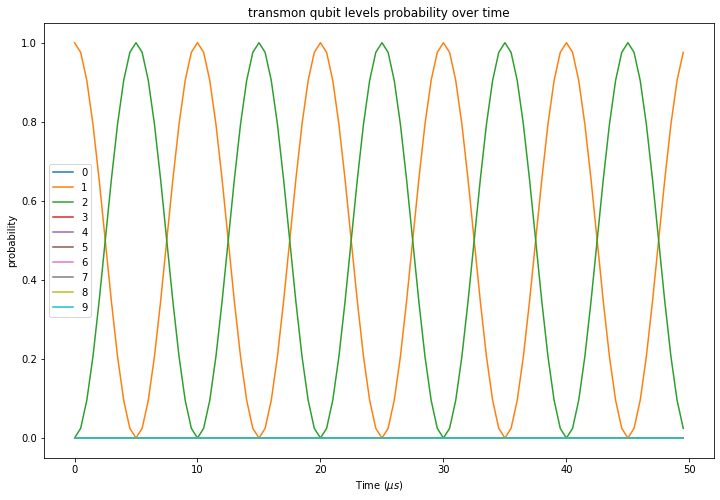

In [65]:
t, rho_zeroNoise = computeDensityMatrix(H, initial_st, T, Nt)

fig, ax = plt.subplots(figsize=(12, 8))


def plotFlipFlopPopulation(t, rho_ff):
    for state in np.arange(rho_ff.shape[1]):
        k = ax.plot(t, rho_ff[:, state, state], label=state)
    return k


plotFlipFlopPopulation(t, rho_zeroNoise)
ax.set_xlabel(r'Time ($\mu s$)')
ax.set_ylabel('probability')
ax.set_title('transmon qubit levels probability over time')
plt.legend()

In the top figure we can see how the probability revolves between $|1>$ and $ |2> $ states. intiaaly transmon was in the exited state and after some time it goes into ground states. and it comes back to exited state after some time again. This is known as **Vaccum Rabi oscillation**. This happens when the resonator and transmon qubit frequencies are same. What happens if they are not same. let's try that... 

/home/pi/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pi/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pi/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pi/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pi/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pi/.local

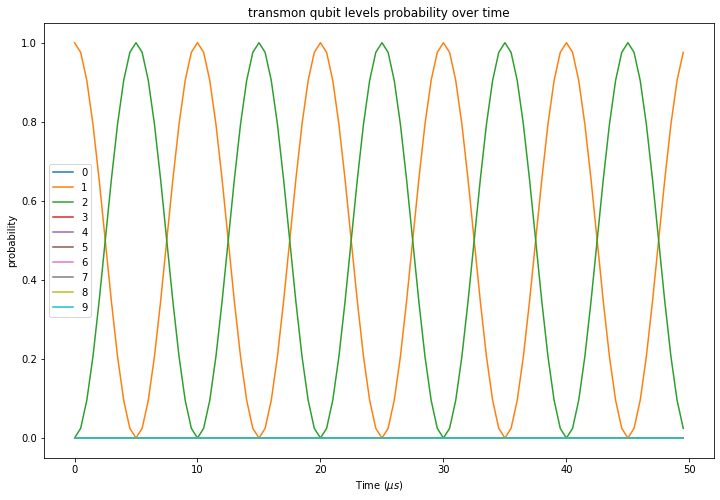

In [68]:
wc = 0.97 * 2 * np.pi  # resonator frequency
wa = 1.0 * 2 * np.pi  # transmon frequency
g = 0.05 * 2 * np.pi  # coupling strength

# Hamiltonian
# H = wc * np.dot(Adag, A) + wa * np.dot(sigplus, sigminus) + g * (np.dot(Adag, sigminus) + np.dot(A, sigplus))

# time evolution and ploting of transmon state probability over time
t, rho_zeroNoise = computeDensityMatrix(H, initial_st, T, Nt)

fig, ax = plt.subplots(figsize=(12, 8))

plotFlipFlopPopulation(t, rho_zeroNoise)
ax.set_xlabel(r'Time ($\mu s$)')
ax.set_ylabel('probability')
ax.set_title('transmon qubit levels probability over time')
plt.legend()

### some key points when frequiencies are not same.

* As we can see now the oscillaton are happening but the probability of being in exited can never be zero entirely. 
* frequancy of oscillation (Rabi frequency) has incresed at off resonance.
* This entirely matches with our theoretical prediction of the Model.
* If we use other modules like **qutip** or **qiskit**, they also predict the same answer.
* rabi frequency is given as $\frac{2g}{2\pi}$ , hence time should be 10 sec for (g = 0.05 . 2. $\pi$ ) one oscillation for resonance.which is also seen in the plot.

### Comparision with the qutip module output.

In [11]:
from qutip import *

In [15]:
# defining parameters
N = 5                  # number of states in resonator mode
wc = 1.0 * 2 * np.pi  # resonator frequency
wa = 1.0 * 2 * np.pi  # transmon frequency
tlist = np.linspace(0, 25, 101)   # gives the range of time over which dynamics is calculated.

# intial state
psi0 = tensor(basis(N, 0), basis(2, 1))    # start with an excited atom

# operators
a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())

# solving the Hamiltonian
c_ops = []             #tells us if there is dissipation of the cavity or transmon

output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm]) # last argument in the form of list tells
                                                                       # which operators expectation values should it give.


### Visualize the results for qutip

Here we plot the excitation probabilities of the resonator and the transmon (these expectation values were calculated by the `mesolve` above). We can clearly see how energy is being coherently transferred back and forth between the resonator and the transmon qubit.

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

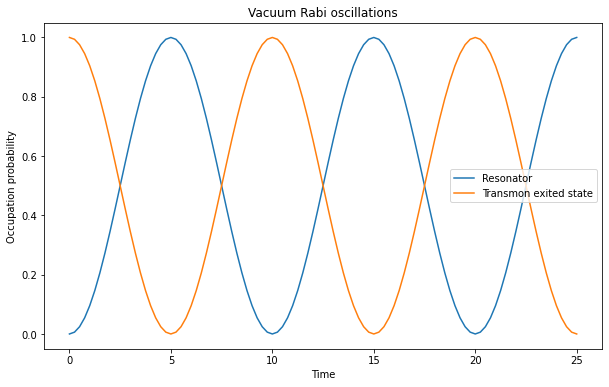

In [16]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Resonator")
axes.plot(tlist, n_a, label="Transmon exited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')